Stock Market Portfolio Optimization

In [87]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [88]:
# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime('%Y-%m-%d')
end_date, start_date

('2025-01-30', '2024-01-31')

In [89]:
# List of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
tickers

['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

In [90]:
data = yf.download(tickers, start=start_date, end=end_date, progress=True)
data.head()

[*********************100%***********************]  4 of 4 completed


Price             Close                                                High  \
Ticker      HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS   
Date                                                                          
2024-01-31  1442.847290  1619.192749  1416.973877  3761.474365  1455.080147   
2024-02-01  1446.596069  1615.439453  1416.998779  3799.129150  1453.748401   
2024-02-02  1426.668213  1650.827881  1447.838623  3909.677979  1460.900704   
2024-02-05  1425.385742  1644.832275  1429.290039  3916.578125  1432.340817   
2024-02-06  1424.645752  1686.021240  1418.140991  4076.955811  1430.170287   

Price                                                      Low               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
Date                                                                          
2024-01-31  1625.383269  1424.547294  3779.266736  1417.444181  1596.965238   
2024-02-01  1634.888436  1433.585756  3849.154658  1436.434898  1608.907627   
2024-02-02  1675.346357  1464.922338  3927.519442  1422.623470  1623.189808   
2024-02-05  1658.042066  1460.552087  3964.582847  1414.731306  1639.616644   
2024-02-06  1689.482143  1432.095870  4090.657282  1413.300674  1631.914917   

Price                                        Open                            \
Ticker      RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2024-01-31  1393.012083  3742.252743  1420.107760  1606.860383  1394.501935   
2024-02-01  1408.456982  3750.730232  1445.313655  1617.876675  1425.292268   
2024-02-02  1423.479631  3816.724137  1455.129536  1624.213489  1423.479631   
2024-02-05  1421.840776  3905.538062  1426.520274  1652.192733  1450.868045   
2024-02-06  1410.219845  3933.040059  1426.076291  1644.393540  1432.095870   

Price                        Volume                                
Ticker           TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                               
2024-01-31  3756.792175    32880520  6763779    15130226  2459358  
2024-02-01  3765.466762    16345370  5760011    13349362  2363107  
2024-02-02  3819.730644    22433877  7858483    19652588  2826510  
2024-02-05  3926.139602    19302523  3634135     8814432  1691523  
2024-02-06  3939.940129    20537870  7694265     9047984  4474396

In [91]:
# Reset index to bring Date into the columns for the melt function
data = data.reset_index()
data.head()

Price        Date        Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2024-01-31  1442.847290  1619.192749  1416.973877  3761.474365   
1      2024-02-01  1446.596069  1615.439453  1416.998779  3799.129150   
2      2024-02-02  1426.668213  1650.827881  1447.838623  3909.677979   
3      2024-02-05  1425.385742  1644.832275  1429.290039  3916.578125   
4      2024-02-06  1424.645752  1686.021240  1418.140991  4076.955811   

Price          High                                                 Low  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1455.080147  1625.383269  1424.547294  3779.266736  1417.444181  ...   
1       1453.748401  1634.888436  1433.585756  3849.154658  1436.434898  ...   
2       1460.900704  1675.346357  1464.922338  3927.519442  1422.623470  ...   
3       1432.340817  1658.042066  1460.552087  3964.582847  1414.731306  ...   
4       1430.170287  1689.482143  1432.095870  4090.657282  1413.300674  ...   

Price                                    Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       1393.012083  3742.252743  1420.107760  1606.860383  1394.501935   
1       1408.456982  3750.730232  1445.313655  1617.876675  1425.292268   
2       1423.479631  3816.724137  1455.129536  1624.213489  1423.479631   
3       1421.840776  3905.538062  1426.520274  1652.192733  1450.868045   
4       1410.219845  3933.040059  1426.076291  1644.393540  1432.095870   

Price                    Volume                                
Ticker       TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0       3756.792175    32880520  6763779    15130226  2459358  
1       3765.466762    16345370  5760011    13349362  2363107  
2       3819.730644    22433877  7858483    19652588  2826510  
3       3926.139602    19302523  3634135     8814432  1691523  
4       3939.940129    20537870  7694265     9047984  4474396  

[5 rows x 21 columns]

In [92]:
data.columns

MultiIndex([(  'Date',            ''),
            ( 'Close', 'HDFCBANK.NS'),
            ( 'Close',     'INFY.NS'),
            ( 'Close', 'RELIANCE.NS'),
            ( 'Close',      'TCS.NS'),
            (  'High', 'HDFCBANK.NS'),
            (  'High',     'INFY.NS'),
            (  'High', 'RELIANCE.NS'),
            (  'High',      'TCS.NS'),
            (   'Low', 'HDFCBANK.NS'),
            (   'Low',     'INFY.NS'),
            (   'Low', 'RELIANCE.NS'),
            (   'Low',      'TCS.NS'),
            (  'Open', 'HDFCBANK.NS'),
            (  'Open',     'INFY.NS'),
            (  'Open', 'RELIANCE.NS'),
            (  'Open',      'TCS.NS'),
            ('Volume', 'HDFCBANK.NS'),
            ('Volume',     'INFY.NS'),
            ('Volume', 'RELIANCE.NS'),
            ('Volume',      'TCS.NS')],
           names=['Price', 'Ticker'])

In [93]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.columns

Index(['Date_', 'Close_HDFCBANK.NS', 'Close_INFY.NS', 'Close_RELIANCE.NS',
       'Close_TCS.NS', 'High_HDFCBANK.NS', 'High_INFY.NS', 'High_RELIANCE.NS',
       'High_TCS.NS', 'Low_HDFCBANK.NS', 'Low_INFY.NS', 'Low_RELIANCE.NS',
       'Low_TCS.NS', 'Open_HDFCBANK.NS', 'Open_INFY.NS', 'Open_RELIANCE.NS',
       'Open_TCS.NS', 'Volume_HDFCBANK.NS', 'Volume_INFY.NS',
       'Volume_RELIANCE.NS', 'Volume_TCS.NS'],
      dtype='object')

In [94]:
data.rename(columns={'Date_': 'Date'}, inplace=True)
data.head()

,Date,Close_HDFCBANK.NS,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_HDFCBANK.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_HDFCBANK.NS,...,Low_RELIANCE.NS,Low_TCS.NS,Open_HDFCBANK.NS,Open_INFY.NS,Open_RELIANCE.NS,Open_TCS.NS,Volume_HDFCBANK.NS,Volume_INFY.NS,Volume_RELIANCE.NS,Volume_TCS.NS
0,2024-01-31,1442.847290,1619.192749,1416.973877,3761.474365,1455.080147,1625.383269,1424.547294,3779.266736,1417.444181,...,1393.012083,3742.252743,1420.107760,1606.860383,1394.501935,3756.792175,32880520,6763779,15130226,2459358
1,2024-02-01,1446.596069,1615.439453,1416.998779,3799.129150,1453.748401,1634.888436,1433.585756,3849.154658,1436.434898,...,1408.456982,3750.730232,1445.313655,1617.876675,1425.292268,3765.466762,16345370,5760011,13349362,2363107
2,2024-02-02,1426.668213,1650.827881,1447.838623,3909.677979,1460.900704,1675.346357,1464.922338,3927.519442,1422.623470,...,1423.479631,3816.724137,1455.129536,1624.213489,1423.479631,3819.730644,22433877,7858483,19652588,2826510
3,2024-02-05,1425.385742,1644.832275,1429.290039,3916.578125,1432.340817,1658.042066,1460.552087,3964.582847,1414.731306,...,1421.840776,3905.538062,1426.520274,1652.192733,1450.868045,3926.139602,19302523,3634135,8814432,1691523
4,2024-02-06,1424.645752,1686.021240,1418.140991,4076.955811,1430.170287,1689.482143,1432.095870,4090.657282,1413.300674,...,1410.219845,3933.040059,1426.076291,1644.393540,1432.095870,3939.940129,20537870,7694265,9047984,4474396


In [95]:
# Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker and attributes
data_melted = data.melt(id_vars=['Date'], var_name='Attribute_Ticker', value_name='Value')
data_melted

,Date,Attribute_Ticker,Value
0,2024-01-31,Close_HDFCBANK.NS,1.442847e+03
1,2024-02-01,Close_HDFCBANK.NS,1.446596e+03
2,2024-02-02,Close_HDFCBANK.NS,1.426668e+03
3,2024-02-05,Close_HDFCBANK.NS,1.425386e+03
4,2024-02-06,Close_HDFCBANK.NS,1.424646e+03
...,...,...,...
4935,2025-01-23,Volume_TCS.NS,1.822998e+06
4936,2025-01-24,Volume_TCS.NS,1.910099e+06
4937,2025-01-27,Volume_TCS.NS,1.551782e+06
4938,2025-01-28,Volume_TCS.NS,2.468272e+06


In [96]:
# As the columns were concateneded with an _, now let's separate them in 'Attribute' (like: Close, High, etc.) and 'Ticker'(Like: HDFCBANK.HS, INFY.NS)
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.split('_', expand=True)
# Removing original column 'Attribute_Ticker'
data_melted.drop(columns=['Attribute_Ticker'], inplace=True)
data_melted

,Date,Value,Attribute,Ticker
0,2024-01-31,1.442847e+03,Close,HDFCBANK.NS
1,2024-02-01,1.446596e+03,Close,HDFCBANK.NS
2,2024-02-02,1.426668e+03,Close,HDFCBANK.NS
3,2024-02-05,1.425386e+03,Close,HDFCBANK.NS
4,2024-02-06,1.424646e+03,Close,HDFCBANK.NS
...,...,...,...,...
4935,2025-01-23,1.822998e+06,Volume,TCS.NS
4936,2025-01-24,1.910099e+06,Volume,TCS.NS
4937,2025-01-27,1.551782e+06,Volume,TCS.NS
4938,2025-01-28,2.468272e+06,Volume,TCS.NS


In [97]:
data_melted.columns, data_melted.head()

(Index(['Date', 'Value', 'Attribute', 'Ticker'], dtype='object'),
         Date        Value Attribute       Ticker
 0 2024-01-31  1442.847290     Close  HDFCBANK.NS
 1 2024-02-01  1446.596069     Close  HDFCBANK.NS
 2 2024-02-02  1426.668213     Close  HDFCBANK.NS
 3 2024-02-05  1425.385742     Close  HDFCBANK.NS
 4 2024-02-06  1424.645752     Close  HDFCBANK.NS)

In [99]:
# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.)
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')
data_pivoted

Attribute                     Close         High          Low         Open  \
Date       Ticker                                                            
2024-01-31 HDFCBANK.NS  1442.847290  1455.080147  1417.444181  1420.107760   
           INFY.NS      1619.192749  1625.383269  1596.965238  1606.860383   
           RELIANCE.NS  1416.973877  1424.547294  1393.012083  1394.501935   
           TCS.NS       3761.474365  3779.266736  3742.252743  3756.792175   
2024-02-01 HDFCBANK.NS  1446.596069  1453.748401  1436.434898  1445.313655   
...                             ...          ...          ...          ...   
2025-01-28 TCS.NS       4040.300049  4102.000000  4028.300049  4070.800049   
2025-01-29 HDFCBANK.NS  1677.300049  1681.150024  1668.849976  1675.000000   
           INFY.NS      1881.250000  1888.650024  1840.500000  1845.000000   
           RELIANCE.NS  1235.500000  1242.750000  1228.050049  1236.000000   
           TCS.NS       4099.799805  4107.850098  4054.000000  4054.000000   

Attribute                   Volume  
Date       Ticker                   
2024-01-31 HDFCBANK.NS  32880520.0  
           INFY.NS       6763779.0  
           RELIANCE.NS  15130226.0  
           TCS.NS        2459358.0  
2024-02-01 HDFCBANK.NS  16345370.0  
...                            ...  
2025-01-28 TCS.NS        2468272.0  
2025-01-29 HDFCBANK.NS   6309945.0  
           INFY.NS       5145155.0  
           RELIANCE.NS   5928156.0  
           TCS.NS        1217089.0  

[988 rows x 5 columns]

In [100]:
# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
stock_data

Attribute,Date,Ticker,Close,High,Low,Open,Volume
0,2024-01-31,HDFCBANK.NS,1442.847290,1455.080147,1417.444181,1420.107760,32880520.0
1,2024-01-31,INFY.NS,1619.192749,1625.383269,1596.965238,1606.860383,6763779.0
2,2024-01-31,RELIANCE.NS,1416.973877,1424.547294,1393.012083,1394.501935,15130226.0
3,2024-01-31,TCS.NS,3761.474365,3779.266736,3742.252743,3756.792175,2459358.0
4,2024-02-01,HDFCBANK.NS,1446.596069,1453.748401,1436.434898,1445.313655,16345370.0
...,...,...,...,...,...,...,...
983,2025-01-28,TCS.NS,4040.300049,4102.000000,4028.300049,4070.800049,2468272.0
984,2025-01-29,HDFCBANK.NS,1677.300049,1681.150024,1668.849976,1675.000000,6309945.0
985,2025-01-29,INFY.NS,1881.250000,1888.650024,1840.500000,1845.000000,5145155.0
986,2025-01-29,RELIANCE.NS,1235.500000,1242.750000,1228.050049,1236.000000,5928156.0


Now, let's have a look at the stock market perfomance of these companies in the stock market over time

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [103]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

Attribute,Date,Ticker,Close,High,Low,Open,Volume
0,2024-01-31,HDFCBANK.NS,1442.847290,1455.080147,1417.444181,1420.107760,32880520.0
1,2024-01-31,INFY.NS,1619.192749,1625.383269,1596.965238,1606.860383,6763779.0
2,2024-01-31,RELIANCE.NS,1416.973877,1424.547294,1393.012083,1394.501935,15130226.0
3,2024-01-31,TCS.NS,3761.474365,3779.266736,3742.252743,3756.792175,2459358.0
4,2024-02-01,HDFCBANK.NS,1446.596069,1453.748401,1436.434898,1445.313655,16345370.0


In [115]:
stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(18, 7))
sns.set(style='whitegrid')
stock_data.head()

Attribute,Date,Ticker,Close,High,Low,Open,Volume
0,2024-01-31,HDFCBANK.NS,1442.847290,1455.080147,1417.444181,1420.107760,32880520.0
1,2024-01-31,INFY.NS,1619.192749,1625.383269,1596.965238,1606.860383,6763779.0
2,2024-01-31,RELIANCE.NS,1416.973877,1424.547294,1393.012083,1394.501935,15130226.0
3,2024-01-31,TCS.NS,3761.474365,3779.266736,3742.252743,3756.792175,2459358.0
4,2024-02-01,HDFCBANK.NS,1446.596069,1453.748401,1436.434898,1445.313655,16345370.0


<Figure size 1800x700 with 0 Axes>

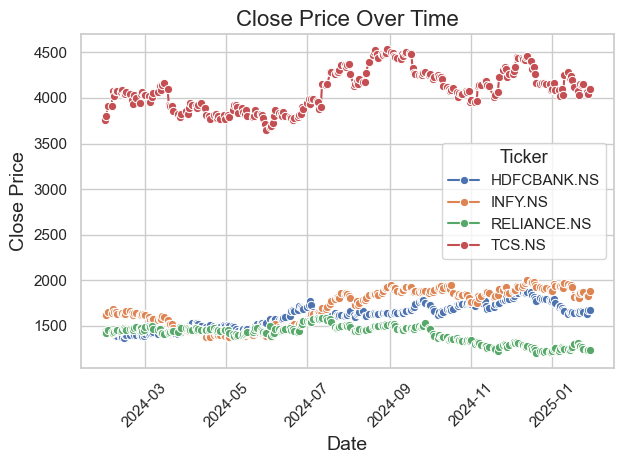

In [117]:
sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()